In [ ]:
#Use Clustering Techniques for the any customer dataset using machine learning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
data=pd.read_csv('C:/Users/swarn/Downloads/archive (5)/Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#therefore no cleaning required
#further taking Annual Income (k$) AND Spending Score (1-100) as our main parameters, we graph :

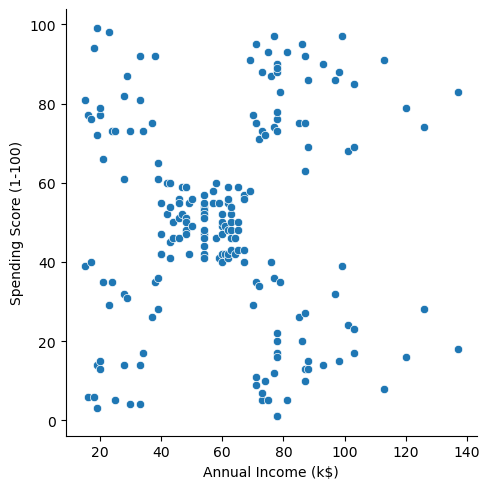

In [8]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)',data=data)

In [ ]:
#To perform K-means clustering, we need to find K value:
#using elbow method: it is used to determine the number of clusters

C:\Users\swarn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\swarn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\swarn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\swarn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlalbel'

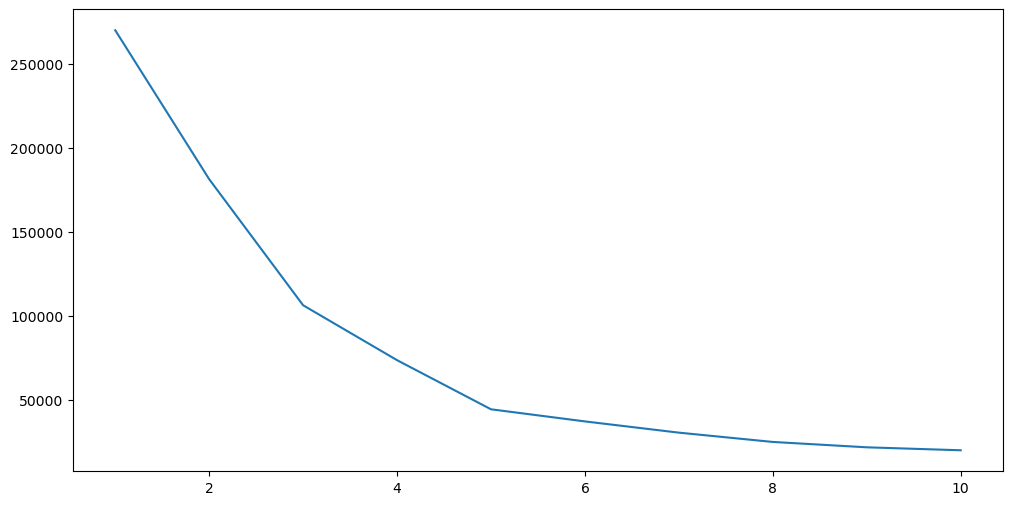

In [14]:
X=data.drop(columns=['CustomerID','Gender','Age'],axis=1).values
cluster_intertia=[]
for i in range(1,11):
    kmeansmodel=KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmeansmodel.fit(X)
    cluster_intertia.append(kmeansmodel.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,11),cluster_intertia)
plt.xlalbel('number of clusters')
plt.ylabel('cluster inertia')
plt.show()

In [ ]:
#cluster Inertia doesnt drop much after 5, therefore we take K=5

In [17]:
kmeansmodel=KMeans(n_clusters=5, init='k-means++', random_state=0)
Y=kmeansmodel.fit_predict(X)

C:\Users\swarn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\swarn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
kmeansmodel=KMeans(n_clusters=5, init='k-means++', random_state=0)
Y=kmeansmodel.fit_predict(X)

In [18]:
kmeansmodel.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

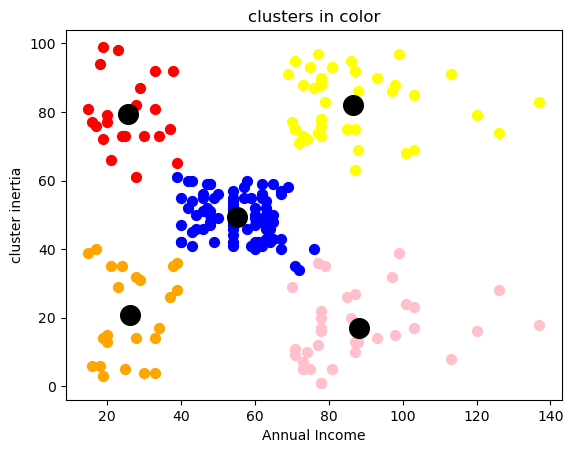

In [21]:
plt.figure
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='pink', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='red', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='orange', label='Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:,0], kmeansmodel.cluster_centers_[:,1], s=200, c='black', label='cluster center')
plt.title('clusters in color')
plt.xlabel('Annual Income')
plt.ylabel('cluster inertia')
plt.show()